In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE
from IPython.display import display
import seaborn as sns

In [19]:
data = pd.read_csv('conversion_data_test.csv')
data2 = pd.read_csv('conversion_data_train.csv')

print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (31620, 5)


In [21]:
data.describe(include = 'all')

,country,age,new_user,source,total_pages_visited
count,31620,31620.000000,31620.000000,31620,31620.000000
unique,4,NaN,NaN,3,NaN
top,US,NaN,NaN,Seo,NaN
freq,17968,NaN,NaN,15563,NaN
mean,NaN,30.620746,0.685579,NaN,4.870398
std,NaN,8.316736,0.464292,NaN,3.333128
min,NaN,17.000000,0.000000,NaN,1.000000
25%,NaN,24.000000,0.000000,NaN,2.000000
50%,NaN,30.000000,1.000000,NaN,4.000000
75%,NaN,36.000000,1.000000,NaN,7.000000


<AxesSubplot:xlabel='country', ylabel='Count'>

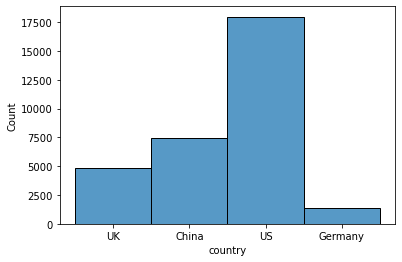

In [3]:
sns.histplot(data.country)

<AxesSubplot:label='785978b6-18a3-40cd-8762-4250e291d5e1', xlabel='age', ylabel='Count'>

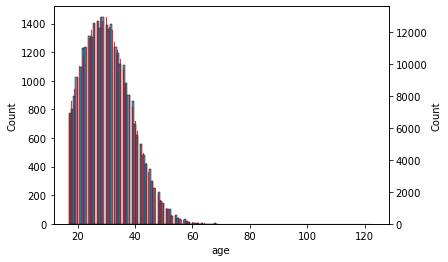

In [16]:
sns.histplot(data.age)
ax2 = plt.twinx()
sns.histplot(data2.age,ax=ax2,color = 'red')

<AxesSubplot:label='b2e2ea61-6bf8-4788-9633-62db09675e92', xlabel='total_pages_visited', ylabel='Count'>

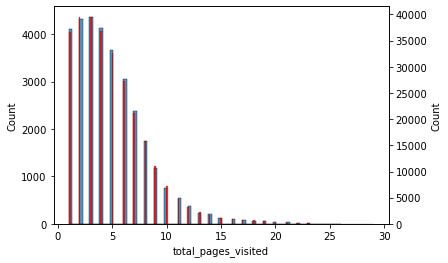

In [15]:
sns.histplot(data.total_pages_visited)
ax2 = plt.twinx()
sns.histplot(data2.total_pages_visited,ax=ax2,color = 'red')

In [32]:
a = list(data2.iloc[:10,:].groupby('country')['source'].apply(list))
a

[['Direct'],
 ['Seo'],
 ['Ads', 'Ads', 'Seo', 'Seo'],
 ['Seo', 'Direct', 'Seo', 'Direct']]